In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import optimize, integrate
%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = 1.5*np.array(mpl.rcParams['figure.figsize'])

 - https://math.stackexchange.com/questions/822092/plotting-differential-equation-phase-diagrams/822113#822113
 - https://docs.scipy.org/doc/scipy/reference/optimize.nonlin.html
 - https://docs.scipy.org/doc/scipy/reference/integrate.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
 - https://mmas.github.io/conics-matplotlib
 - https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html
 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html

In [3]:
def dxdt(t, x):
    return np.array([
        -x[0] + x[1],
        x[0]*(4 - x[1])
    ])

In [4]:
def system(x):
    return dxdt(None, x)

In [5]:
x = np.linspace(-2, 6, 21)
y = x.copy()

In [6]:
def grid(x, y, f):
    X, Y = np.meshgrid(x, y)
    Xd = np.array(list(zip(X.flatten(), Y.flatten())))
    Z = f(Xd.T)
    Z0 = Z[0,:].reshape(X.shape)
    Z1 = Z[1,:].reshape(X.shape)
    return ((X,Y), Xd, (Z0,Z1))

In [7]:
X, Xd, Z = grid(x, y, system)

In [8]:
sol1 = optimize.broyden1(system, [1,1], f_tol=1e-14)
sol1

array([4., 4.])

In [9]:
sol2 = optimize.broyden1(lambda x: -system(x), [-1,-1], f_tol=1e-14)
sol2

array([-1.1542371e-16, -5.9822062e-16])

In [10]:
def plot(X, Z, S):
    fig, axe = plt.subplots()
    axe.contour(*X, Z[0], [0])
    axe.contour(*X, Z[1], [0])
    axe.quiver(*X, *Z, units='width')
    for s in S:
        axe.plot(*s, 'o')
    axe.set_xlabel(r"$x_0$")
    axe.set_ylabel(r"$x_1$")
    axe.set_aspect('equal')
    axe.grid()
    return fig

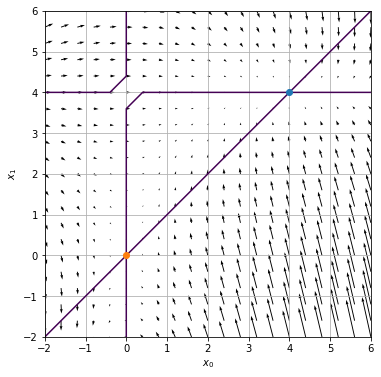

In [11]:
fig = plot(X, Z, [sol1, sol2])

In [12]:
x = np.arange(-2.5, 7)
y = x.copy()
X, Xd, Z = grid(x, y, system)

In [13]:
sols = []
for x0 in Xd:
    sols.append(integrate.solve_ivp(dxdt, [0, 10], x0, max_step=0.01))

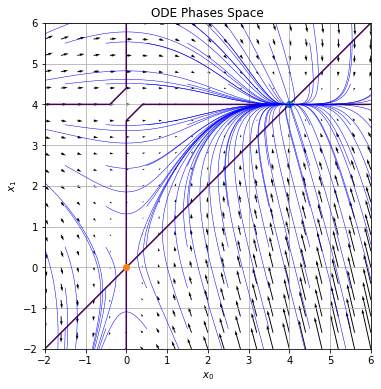

In [14]:
axe = fig.get_axes()[0]
for sol in sols:
    axe.plot(sol.y[0], sol.y[1], '-b', linewidth=0.5)
axe.set_xlim([-2,6])
axe.set_ylim([-2,6])
axe.set_title("ODE Phases Space")
fig

Text(0.5, 1.0, 'ODE Time Solutions')

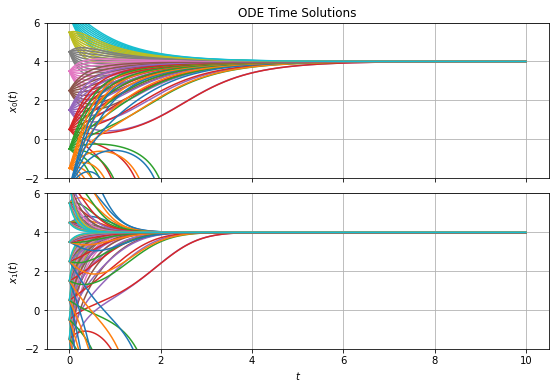

In [16]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1})
for sol in sols:
    axes[0].plot(sol.t, sol.y[0])
    axes[1].plot(sol.t, sol.y[1])
axes[0].set_ylim([-2, +6])
axes[1].set_xlabel(r"$t$")
axes[0].set_ylabel(r"$x_0(t)$")
axes[1].set_ylabel(r"$x_1(t)$")
for i in range(2):
    axes[i].grid()
axes[0].set_title("ODE Time Solutions")